In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


In [2]:
#Loading the dataset
data = pd.read_csv('HousingData.csv')

In [3]:
#exploring the dataset
print(data.info())  
print(data.describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

In [4]:
#Data Preprocessing #Handling missing values
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Checking if there are any missing values
print(data_imputed.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [5]:
#Checking column name
print(data_imputed.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


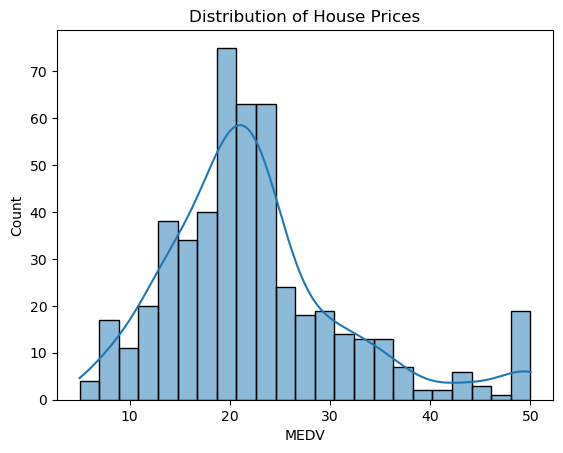

In [6]:
#Handling  Outliers 
## Visualizing  the distribution of the target variable
sns.histplot(data_imputed['MEDV'], kde=True)
plt.title("Distribution of House Prices")
plt.show()

In [7]:
#Selecting Feature as medv
X = data_imputed.drop(columns=['MEDV'])
y = data_imputed['MEDV']

In [8]:
#Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#Model Selection - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
#Model Evaluation - Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

In [12]:
# Calculate Mean Squared Error and R-squared for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


In [13]:
# Display evaluation results
print(f"Linear Regression: MSE = {mse_lr:.2f}, R2 = {r2_lr:.2f}")


Linear Regression: MSE = 25.00, R2 = 0.66


In [14]:
# Fine-tuning the Linear Regression Model
from sklearn.linear_model import Ridge, Lasso

In [15]:
# Example of Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [16]:
# Example of Lasso Regression (L1 regularization)
lasso_model = Lasso(alpha=0.1)  # alpha controls the strength of regularization
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [17]:
# Compare the results of Ridge, Lasso, and the original Linear Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Ridge Regression: MSE = {mse_ridge:.2f}, R2 = {r2_ridge:.2f}")
print(f"Lasso Regression: MSE = {mse_lasso:.2f}, R2 = {r2_lasso:.2f}")

Ridge Regression: MSE = 25.00, R2 = 0.66
Lasso Regression: MSE = 26.10, R2 = 0.64


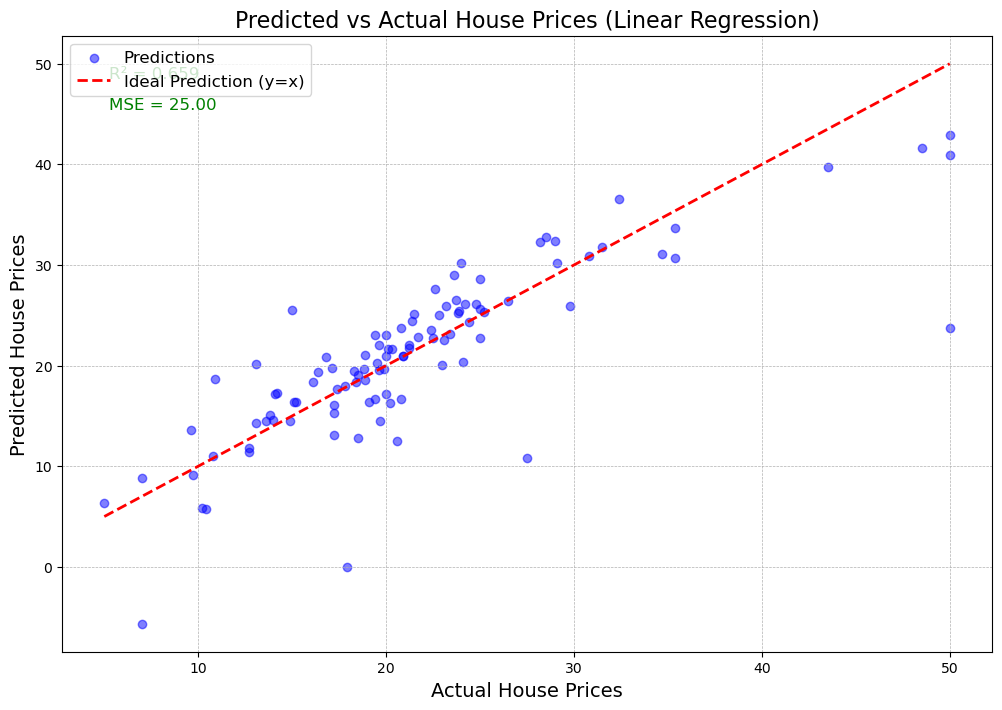

In [18]:
# Visualize the predictions vs actual values
# Calculate R² and MSE for the model
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Creating the plot
plt.figure(figsize=(12, 8))  # Increased figure size for better readability

# Scatter plot of Actual vs Predicted values
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Predictions')  # Points in blue

# Red dashed line showing the perfect prediction (ideal case where predicted == actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2, label='Ideal Prediction (y=x)') 

# Title and Labels
plt.title('Predicted vs Actual House Prices (Linear Regression)', fontsize=16)
plt.xlabel('Actual House Prices', fontsize=14)
plt.ylabel('Predicted House Prices', fontsize=14)

# Grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding the R² and MSE to the plot
plt.text(0.05, 0.95, f'R² = {r2_lr:.3f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='green')
plt.text(0.05, 0.90, f'MSE = {mse_lr:.2f}', ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, color='green')

# Adding a legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()
